In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [35]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

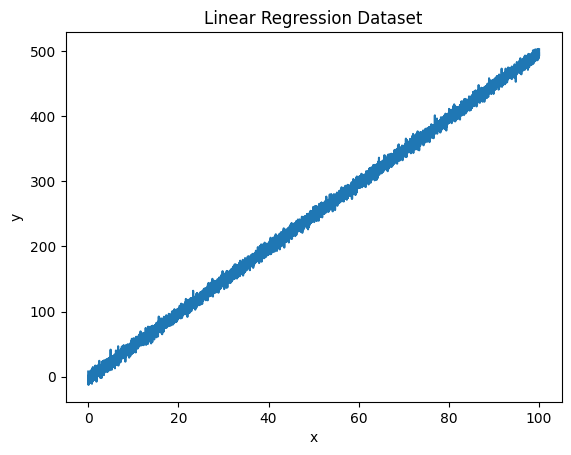

In [51]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [52]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [53]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [39]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=10000, print_cost=True)

Cost after iteration 0: 1.753631684920931
Cost after iteration 1000: 0.0340573777398924
Cost after iteration 2000: 0.03212470420447224
Cost after iteration 3000: 0.03135818807430117
Cost after iteration 4000: 0.030994900060506304
Cost after iteration 5000: 0.030810929974409644
Cost after iteration 6000: 0.03069950565824948
Cost after iteration 7000: 0.030630397126060912
Cost after iteration 8000: 0.030584408815918777
Cost after iteration 9000: 0.030573585796689097
Cost after iteration 9999: 0.030570126776611178


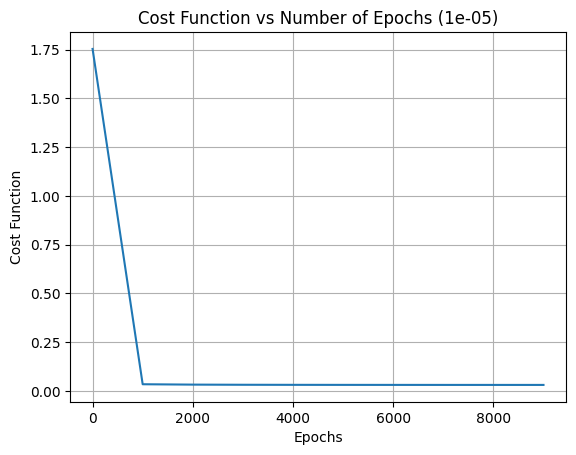

In [40]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [41]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.03057012330900226


In [9]:
pred = model.predict(test_x, test_y)

RMSE: 0.044282195188055394


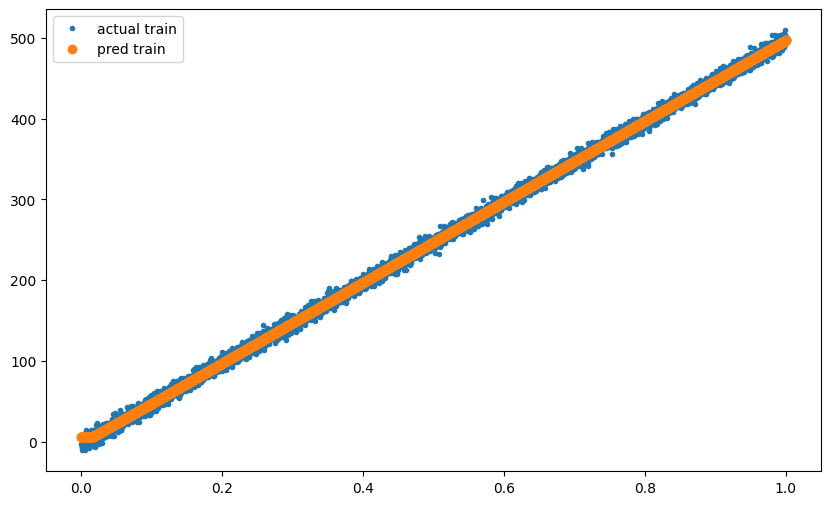

In [10]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

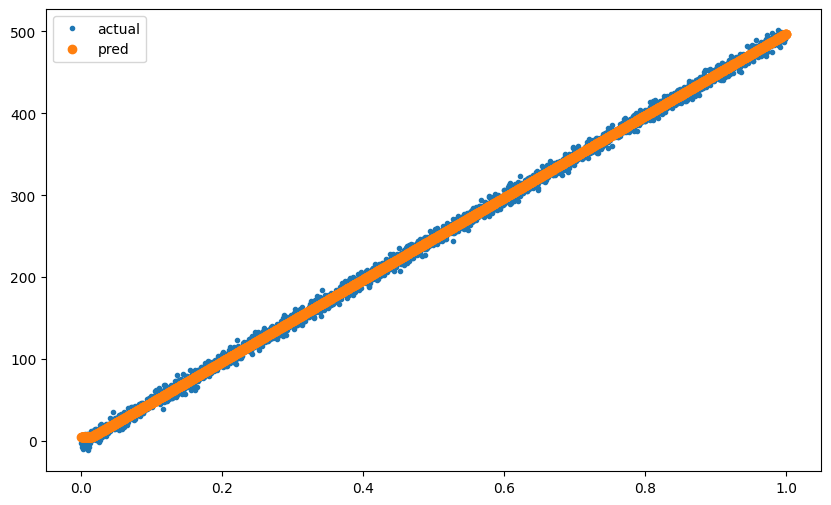

In [11]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

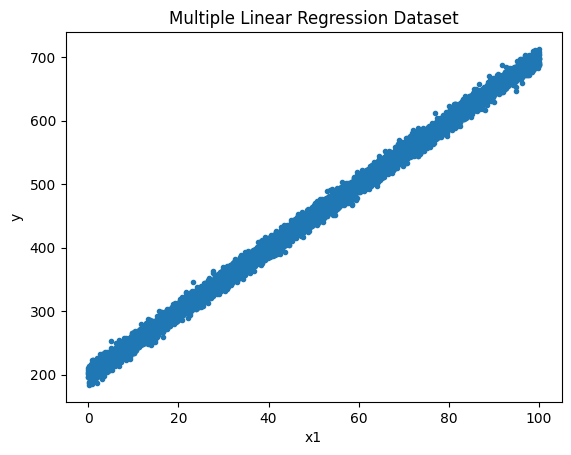

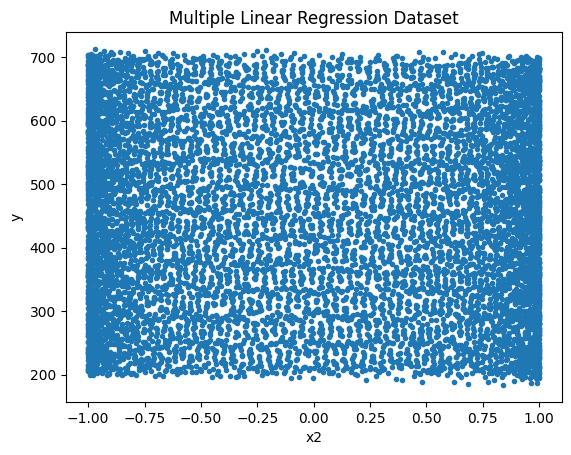

In [43]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [44]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

In [45]:
for col in train_x.columns:
    train_x[col] = min_max_scaler(train_x[col])

# 3. Prediction

In [46]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-4, n_epochs=30000, print_cost=True)

Cost after iteration 0: 2.321010797219067
Cost after iteration 1000: 2.1170107861754346
Cost after iteration 2000: 1.932757936978214
Cost after iteration 3000: 1.767664468116774
Cost after iteration 4000: 1.6200207740343782
Cost after iteration 5000: 1.488276367210071
Cost after iteration 6000: 1.371021163201681
Cost after iteration 7000: 1.2669680145181004
Cost after iteration 8000: 1.174936555113228
Cost after iteration 9000: 1.093838523373043
Cost after iteration 10000: 1.022664820937592
Cost after iteration 11000: 0.9604746102780696
Cost after iteration 12000: 0.9063867281761486
Cost after iteration 13000: 0.859573578668544
Cost after iteration 14000: 0.8192574738819571
Cost after iteration 15000: 0.7847091491968854
Cost after iteration 16000: 0.7552479474484293
Cost after iteration 17000: 0.7302430067750074
Cost after iteration 18000: 0.7091147410357799
Cost after iteration 19000: 0.6913359784796375
Cost after iteration 20000: 0.6764322958003887
Cost after iteration 21000: 0.66398

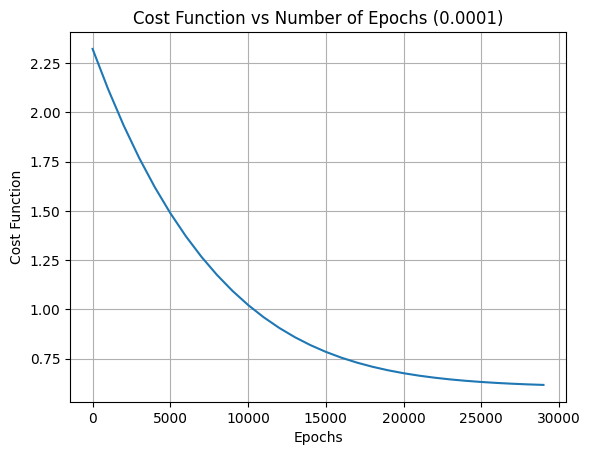

In [47]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [49]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.6147789917137859


In [50]:
pred_train

array([356.36049013, 356.36049013, 356.36049013, ..., 356.36049013,
       356.36049013, 356.36049013])

In [18]:
pred = model.predict(test_x, test_y)

RMSE: 2.4860158684935016


# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [5]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [6]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [7]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [29]:
n_epochs = 50

In [30]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 3, 3, 1], task='regression', learning_rate=1e-4, n_epochs=n_epochs, print_cost=True)

Cost after iteration 0: 0.01006380716738451
Cost after iteration 49: 0.010048516162885884


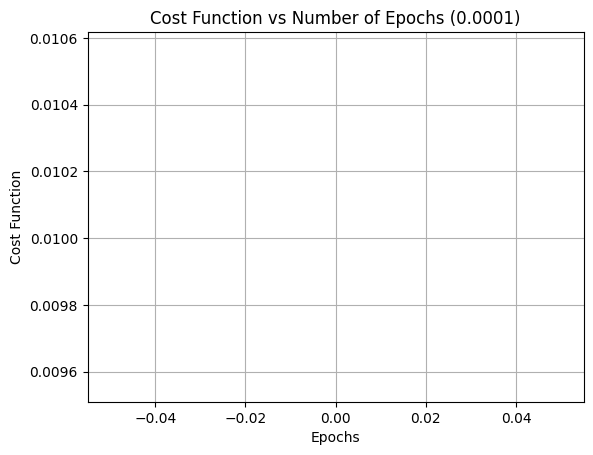

In [31]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [32]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.010048151021839202


<Axes: title={'center': '50'}, ylabel='Frequency'>

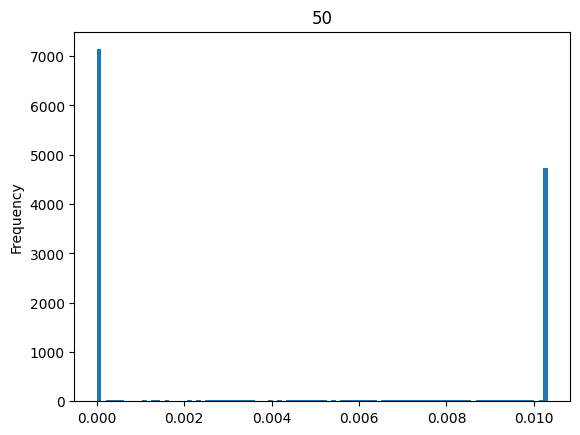

In [33]:
pd.Series(pred_train).plot(kind='hist', bins=100, title=f'{n_epochs}')

<Axes: ylabel='Frequency'>

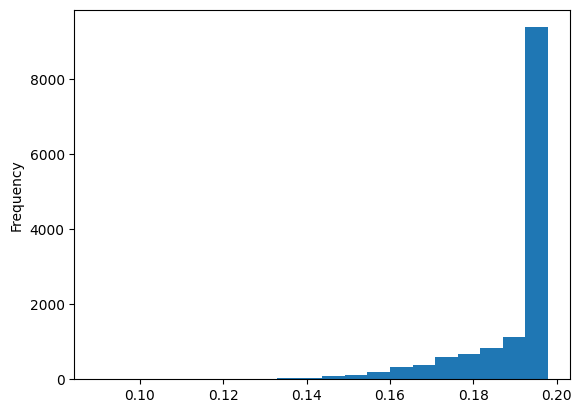

In [22]:
pd.Series(pred_train).plot(kind='hist', bins=20, title=f'{n_epochs}')

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_train, train_y)**0.5

1.381472210314717

In [57]:
pred = model.predict(test_x, test_y)

RMSE: 0.007543734026448298


In [58]:
result_df = pd.DataFrame(data={'actual':test_y[test_y.columns[0]], 'pred': pred})

In [59]:
result_df

,actual,pred
20046,0.47700,1.60626
3024,0.45800,1.60626
15663,5.00001,1.60626
20484,2.18600,1.60626
9814,2.78000,1.60626
...,...,...
15316,1.66100,1.60626
14772,0.93600,1.60626
12870,1.07000,1.60626
13476,1.30700,1.60626


In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y.values, pred)

2.268099729882015